# Results

In [44]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from scipy.stats import chi2_contingency
from thesis import get_range_percentages,get_cat_percentages
from thesis import print_attr_stats,plot_graph,analyse_range,analyse_category

In [45]:
part_map = {}
part_map['Leg'] = 'Limb'
part_map['Ankle'] = 'Joint'
part_map['Hand'] = 'Acral'
part_map['Wrist'] = 'Joint'
part_map['Foot'] = 'Acral'
part_map['Abdomen'] = 'Trunk'
part_map['Face'] = 'Head and Neck'
part_map['Knee'] = 'Joint'
part_map['Forearm'] = 'Limb'

In [46]:
# Plotting defaults
plotting_defaults = {}
plotting_defaults["colormap"] = matplotlib.cm.Accent
plotting_defaults["stacked"] = False
plotting_defaults["grid"] = True
plotting_defaults["fontsize"] = 15
plotting_defaults["kind"] = 'bar'
plotting_defaults["figsize"] = (6,4)
plotting_defaults["rot"] = 360
#plotting_defaults["style"] = "grayscale"
plotting_defaults["ylim"] = (0,105)
plt.style.use("grayscale")

In [47]:
# Read the data from csv files
patients_df = pd.read_csv("thesis_patient.csv")
pdf_a = patients_df[patients_df.group=="A"]
pdf_b = patients_df[patients_df.group=="B"]
sites_df = pd.read_csv("thesis_sites.csv")
sites_df['broad_site'] = sites_df['norm_sites'].map(lambda x : part_map[x])
sdf_a = sites_df[sites_df.group=="A"]
sdf_b = sites_df[sites_df.group=="B"]

A total of **11** patients were enrolled in the study, which included 30 vitiligo sites for split thickness skin grafting (STSG) (Group A) and 30 sites for autologous noncultured melanocyte transfer (AMT)(Group B). Though 30 sites each were subjected to surgery in both the groups,Therefore data of only 30 sites each of both the groups(total of 11 patients) were considered for the statistical analysis

## Age Wise Distribution of patients

In [48]:
# Set the input data
attribute = "age"
age_ranges = [[12,25],[26,50]]
age_unit = "Years"
data = (pdf_a,pdf_b)

In [49]:
# Print stats
print_attr_stats(patients_df,attribute)
print_attr_stats(pdf_a,attribute)
print_attr_stats(pdf_b,attribute)

age Statistics
Number of elements:11
ranges from 12 to 42 with mean=24.09 and SD=10.83
age Statistics
Number of elements:6
ranges from 12 to 22 with mean=18.00 and SD=3.52
age Statistics
Number of elements:5
ranges from 15 to 42 with mean=31.40 and SD=12.46


In [50]:
# Analyze data
(mydf,obs,chi_square_value,p_value) = analyse_range(data,age_ranges,attribute,age_unit)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

chi-square:4.950,p_value:0.026


In [51]:
mydf.head()

,12-25 Years,26-50 Years
Group-A,100,0
Group-B,40,60


In [52]:
print(obs)

[[ 6.  0.]
 [ 2.  3.]]


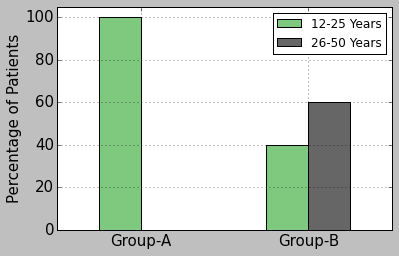

In [53]:
fname = "age_distribution"
ylabel = "Percentage of Patients"
ax = mydf.plot(**plotting_defaults)
ax.set_ylabel(ylabel,fontdict={'fontsize':plotting_defaults["fontsize"]})
plt.savefig(fname)

## Gender Wise Distribution of patients

In [54]:
# Set the input data
attribute = "gender"
data = (pdf_a,pdf_b)

In [55]:
# Analyze data
mydf,obs,chi_square_value,p_value = analyse_category(data,attribute)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

chi-square:4.412,p_value:0.036


In [56]:
mydf.head()

,F,M
Group-A,83.333333,16.666667
Group-B,20.000000,80.000000


In [57]:
print(obs)

[[ 5.  1.]
 [ 1.  4.]]


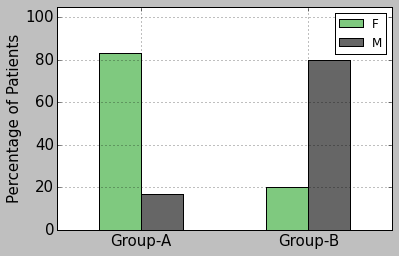

In [58]:
fname="gender_distribution"
ylabel = "Percentage of Patients"
ax = mydf.plot(**plotting_defaults)
ax.set_ylabel(ylabel,fontdict={'fontsize':plotting_defaults["fontsize"]})
plt.savefig(fname)

## Duration of Vitiligo by sites

In [59]:
# Set the input data
attribute = "duration_of_vitiligo_yrs"
dur_ranges = [[1,5],[6,10],[11,20],[21,100]]
dur_unit = "Years"
data = (sdf_a,sdf_b)

In [60]:
# print stats
print_attr_stats(sites_df,attribute)
print_attr_stats(sdf_a,attribute)
print_attr_stats(sdf_b,attribute)

duration_of_vitiligo_yrs Statistics
Number of elements:60
ranges from 2 to 32 with mean=18.77 and SD=9.61
duration_of_vitiligo_yrs Statistics
Number of elements:30
ranges from 3 to 15 with mean=12.13 and SD=4.31
duration_of_vitiligo_yrs Statistics
Number of elements:30
ranges from 2 to 32 with mean=25.40 and SD=8.85


In [61]:
# Analyze
mydf,obs,chi_square_value,p_value = analyse_range(data,dur_ranges,attribute,dur_unit)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

chi-square:51.111,p_value:0.000


In [62]:
mydf.head()

,1-5 Years,6-10 Years,11-20 Years,>20 Years
Group-A,16.666667,6.666667,76.666667,0.000000
Group-B,13.333333,0.000000,0.000000,86.666667


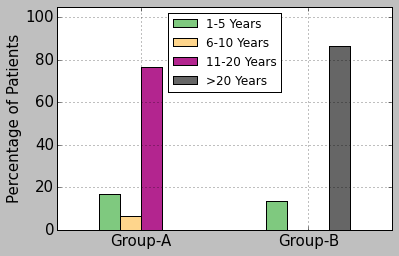

In [63]:
fname="duration_vitiligo"
ax = mydf.plot(**plotting_defaults)
ax.set_ylabel(ylabel,fontdict={'fontsize':plotting_defaults["fontsize"]})
plt.savefig(fname)

## Stability Duration by site

In [64]:
# Set the input data
attribute = "stability_yrs"
stb_ranges = [[1,2],[3,5],[6,10],[11,100]]
stb_unit = "Years"
data = (sdf_a,sdf_b)

In [65]:
# print Stats
print_attr_stats(sites_df,attribute)
print_attr_stats(sdf_a,attribute)
print_attr_stats(sdf_b,attribute)

stability_yrs Statistics
Number of elements:60
ranges from 1 to 12 with mean=5.95 and SD=4.03
stability_yrs Statistics
Number of elements:30
ranges from 1 to 4 with mean=2.77 and SD=0.99
stability_yrs Statistics
Number of elements:30
ranges from 1 to 12 with mean=9.13 and SD=3.33


In [66]:
# Analyze
mydf,obs,chi_square_value,p_value = analyse_range(data,stb_ranges,attribute,stb_unit)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

chi-square:48.923,p_value:0.000


In [67]:
mydf.head()

,1-2 Years,3-5 Years,6-10 Years,>10 Years
Group-A,30.000000,70,0,0.000000
Group-B,13.333333,0,70,16.666667


In [68]:
print(obs)

[[  9.  21.   0.   0.]
 [  4.   0.  21.   5.]]


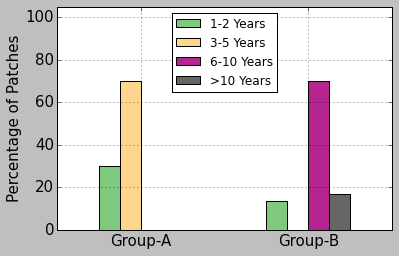

In [69]:
fname="stability_vitiligo"
ylabel = "Percentage of Patches"
ax = mydf.plot(**plotting_defaults)
ax.set_ylabel(ylabel,fontdict={'fontsize':plotting_defaults["fontsize"]})
plt.savefig(fname)

## Type of Vitiligo Distribution by sites

In [70]:
# Set input data
attribute = "type_of_vitiligo"
data = (sdf_a,sdf_b)
categories = sites_df.type_of_vitiligo.unique()

In [71]:
# Analyze data
mydf,obs,chi_square_value,p_value = analyse_category(data,attribute,categories=categories)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

chi-square:4.286,p_value:0.117


In [72]:
mydf.head()

,Segmental vitiligo,Non Segmental,Focal viitligo
Group-A,10,86.666667,3.333333
Group-B,0,100.000000,0.000000


In [73]:
#new_df = pd.DataFrame([[10,86,4],[5,80,15],[20,80,0]],columns=('sv','nsv','fv'),index=('GrA','GrB','GrC'))
#plot_graph(new_df,stacked=True)
#xx = new_df.plot(kind='bar',figsize=(8,4),rot=360,colormap=matplotlib.cm.Accent_r,legend='reverse',stacked=True,width=0.3)
#xx.set_
#plt.show()

In [74]:
print(obs)

[[  3.  26.   1.]
 [  0.  30.   0.]]


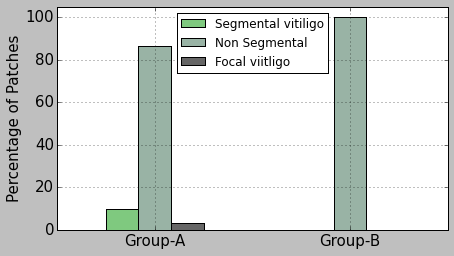

In [75]:
fname="type_of_vitiligo"
ylabel = "Percentage of Patches"
plotting_defaults["figsize"] = (7,4)
ax = mydf.plot(**plotting_defaults)
ax.set_ylabel(ylabel,fontdict={'fontsize':plotting_defaults["fontsize"]})
plt.savefig("fname")
plotting_defaults["figsize"] = (6,4)

## Sites of Vitiligo

In [76]:
# Set input data
attribute = "broad_site"
data = (sdf_a,sdf_b)
categories = sites_df[attribute].unique()

In [77]:
# Analyze data
mydf,obs,chi_square_value,p_value = analyse_category(data,attribute,categories=categories)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

chi-square:8.848,p_value:0.065


In [78]:
mydf.head()

,Limb,Joint,Acral,Trunk,Head and Neck
Group-A,30,40.000000,13.333333,6.666667,10
Group-B,60,33.333333,6.666667,0.000000,0


In [79]:
print(obs)

[[  9.  12.   4.   2.   3.]
 [ 18.  10.   2.   0.   0.]]


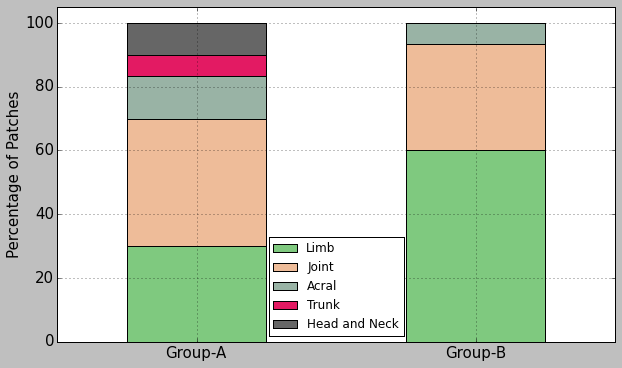

In [80]:
fname="sites_of_vitiligo"
ylabel = "Percentage of Patches"
plotting_defaults["figsize"] = (10,6)
plotting_defaults["stacked"] = True
ax = mydf.plot(**plotting_defaults)
ax.set_ylabel(ylabel,fontdict={'fontsize':plotting_defaults["fontsize"]})
plt.savefig(fname)
plotting_defaults["figsize"] = (6,4)
plotting_defaults["stacked"] = False

## Onset distribution by sites

In [81]:
# Set input data
attribute = "onset"
data = (sdf_a,sdf_b)
onset_ranges = [[1,14],[15,30],[31,90]]
onset_unit = "days"

In [82]:
# Print stats
print_attr_stats(sites_df,attribute)
print_attr_stats(sdf_a,attribute)
print_attr_stats(sdf_b,attribute)

onset Statistics
Number of elements:60
ranges from 8 to 90 with mean=28.15 and SD=17.88
onset Statistics
Number of elements:30
ranges from 8 to 30 with mean=13.97 and SD=4.79
onset Statistics
Number of elements:30
ranges from 20 to 90 with mean=42.33 and SD=14.55


In [83]:
# Analyze
mydf,obs,chi_square_value,p_value = analyse_range(data,onset_ranges,attribute,onset_unit)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

chi-square:31.200,p_value:0.000


In [84]:
mydf.head()

,1-14 days,15-30 days,31-90 days
Group-A,40,60,0
Group-B,0,40,60


In [85]:
print(obs)

[[ 12.  18.   0.]
 [  0.  12.  18.]]


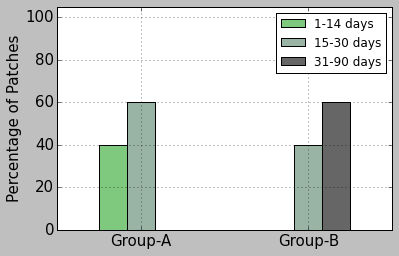

In [86]:
fname="onset_vitiligo"
ylabel = "Percentage of Patches"
ax = mydf.plot(**plotting_defaults)
ax.set_ylabel(ylabel,fontdict={'fontsize':plotting_defaults["fontsize"]})
plt.savefig(fname)

## Type of Repigmentation

In [87]:
# Set input data
attribute = "type_of_repigmentation"
data = (sdf_a,sdf_b)
categories = sites_df[attribute].unique()

In [88]:
# Analyze data
mydf,obs,chi_square_value,p_value = analyse_category(data,attribute,categories=categories)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

chi-square:25.616,p_value:0.000


In [89]:
mydf.head()

,Perifollicular,perifollicular,diffuse,diffuse,Diffuse,Marginal,marginal
Group-A,13.333333,20,3.333333,40.000000,23.333333,0.000000,0.000000
Group-B,6.666667,0,0.000000,16.666667,26.666667,46.666667,3.333333


In [90]:
print(obs)

[[  4.   6.   1.  12.   7.   0.   0.]
 [  2.   0.   0.   5.   8.  14.   1.]]


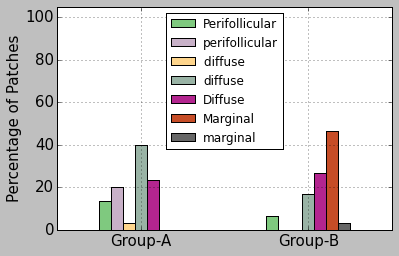

In [91]:
fname="type_of_repigmentation"
ylabel = "Percentage of Patches"
ax = mydf.plot(**plotting_defaults)
ax.set_ylabel(ylabel,fontdict={'fontsize':plotting_defaults["fontsize"]})
plt.savefig(fname)

## Comparision of Degree of Repigmentation(Sub)

In [92]:
# Ye to have the data

In [93]:
def get_matrix_ranges(col_attr,row_attr,col_ranges,row_ranges,col_unit,row_unit,data_set):
    data = []
    index = [str(x[0]) + "-" + str(x[1]) + " " + row_unit for x in row_ranges]
    columns = [str(x[0]) + "-" + str(x[1]) + " " + col_unit for x in col_ranges]
    data_set = data_set.copy()
    for row_range in row_ranges:
        row_range_min = row_range[0]
        row_range_max = row_range[1]
        subset = data_set[(data_set[row_attr] >= row_range_min) & (data_set[row_attr] <= row_range_max)]
        if (len(subset) > 0):
            mydf1 = get_range_percentages(subset,col_attr,col_ranges,col_unit)
            data.append(np.array(mydf1[1]))
        else:
            data.append(np.zeros(len(col_ranges)))
    return pd.DataFrame(data=data,index=index,columns=columns)

In [94]:
def get_matrix_categories(col_attr,row_attr,col_ranges,col_unit,data_set,categories):
    data = []
    index = categories
    columns = [str(x[0]) + "-" + str(x[1]) + " " + col_unit for x in col_ranges]
    data_set = data_set.copy()
    for category in categories:
        subset = data_set[data_set[row_attr] == category]
        if (len(subset) > 0):
            mydf1 = get_range_percentages(subset,col_attr,col_ranges,col_unit)
            data.append(np.array(mydf1[1]))
        else:
            data.append(np.zeros(len(col_ranges)))
    return pd.DataFrame(data=data,index=index,columns=columns)

In [95]:
def remove_zeros(obs):
    non_zero_filter = ~((obs[0,] == 0) & (obs[1,] == 0))
    first = (obs[0,][non_zero_filter])
    second = (obs[1,][non_zero_filter])
    new_obs = np.array([first,second])
    return new_obs

In [96]:
def cal_percentage(df1):
    df1p = df1.copy()
    for idx in df1p.index:
        df1p.loc[idx] = df1p.loc[idx]*100/df1p.loc[idx].sum()
    return df1p

## Comparision of Degree of Repigmentation(Obj) - Month wise

In [97]:
# Set input data
attribute = "DOR_01"
data = (sdf_a,sdf_b)
col_ranges = [(0,25),(26,50),(51,75),(76,100)] # DOR ranges
col_unit = "%"

In [98]:
# Analyze
mydf_01,obs,chi_square_value,p_value = analyse_range(data,col_ranges,attribute,col_unit)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

chi-square:24.772,p_value:0.000


In [99]:
# Set input data
attribute = "DOR_03"
data = (sdf_a,sdf_b)
col_ranges = [(0,25),(26,50),(51,75),(76,100)] # DOR ranges
col_unit = "%"

In [100]:
# Analyze
mydf_03,obs,chi_square_value,p_value = analyse_range(data,col_ranges,attribute,col_unit,convert_zero=True)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

chi-square:26.084,p_value:0.000


In [101]:
# Set input data
attribute = "DOR_06"
data = (sdf_a,sdf_b)
col_ranges = [(0,25),(26,50),(51,75),(76,100)] # DOR ranges
col_unit = "%"

In [102]:
# Analyze
mydf_06,obs,chi_square_value,p_value = analyse_range(data,col_ranges,attribute,col_unit,convert_zero=True)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

chi-square:16.500,p_value:0.001


In [103]:
group_a_data = [mydf_01.loc['Group-A'],mydf_03.loc['Group-A'],mydf_06.loc['Group-A']]
group_a_df = pd.DataFrame(data=group_a_data,columns=mydf_01.columns,index=['1M','3M','6M'])
group_a_df.head()

,0-25 %,26-50 %,51-75 %,>75 %
1M,0,23.333333,23.333333,53.333333
3M,0,10.000000,0.000000,90.000000
6M,0,10.000000,0.000000,90.000000


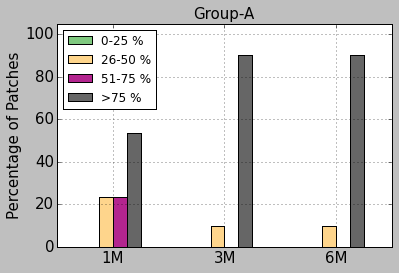

In [104]:
fname="dor_comparision_GrA"
ylabel = "Percentage of Patches"
ax = group_a_df.plot(**plotting_defaults)
ax.set_ylabel(ylabel,fontdict={'fontsize':plotting_defaults["fontsize"]})
ax.set_title("Group-A",fontdict={'fontsize':plotting_defaults["fontsize"]})
plt.savefig(fname)

In [105]:
group_b_data = [mydf_01.loc['Group-B'],mydf_03.loc['Group-B'],mydf_06.loc['Group-B']]
group_b_df = pd.DataFrame(data=group_b_data,columns=mydf_01.columns,index=['1M','3M','6M'])
group_b_df.head()

,0-25 %,26-50 %,51-75 %,>75 %
1M,46.666667,30.000000,0.000000,23.333333
3M,40.000000,33.333333,0.000000,26.666667
6M,30.000000,23.333333,3.333333,43.333333


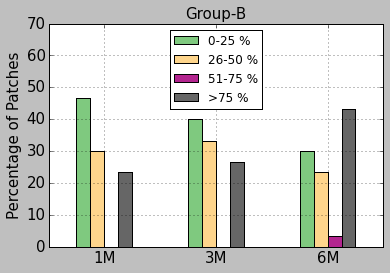

In [106]:
fname="dor_comparision_GrB"
ylabel = "Percentage of Patches"
plotting_defaults["ylim"] = (0,70)
ax = group_b_df.plot(**plotting_defaults)
ax.set_ylabel(ylabel,fontdict={'fontsize':plotting_defaults["fontsize"]})
ax.set_title("Group-B",fontdict={'fontsize':plotting_defaults["fontsize"]})
plt.savefig(fname)
plotting_defaults["ylim"] = (0,105)

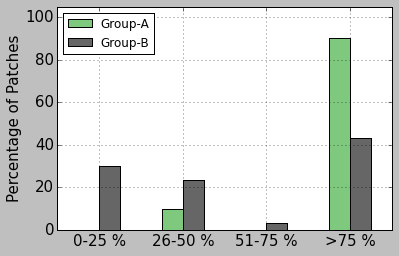

In [107]:
mydf_06.T
fname="dor_comparision_06_GrA_GrB"
ylabel = "Percentage of Patches"
ax = mydf_06.T.plot(**plotting_defaults)
ax.set_ylabel(ylabel,fontdict={'fontsize':plotting_defaults["fontsize"]})
#ax.set_title("Group-B",fontdict={'fontsize':plotting_defaults["fontsize"]})
plt.savefig(fname)

## Comparision of  lesions achieving 100% repigmentation in 06 Months in both groups

In [108]:
# Set the input data
attribute = "DOR_06"
dor_ranges = [[0,89],[90,100]]
dor_unit = "%"
data = (sdf_a,sdf_b)

In [109]:
# Analyze
mydf,obs,chi_square_value,p_value = analyse_range(data,dor_ranges,attribute,dor_unit,convert_zero=False)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

chi-square:10.335,p_value:0.001


In [110]:
print (obs)

[[  5.  25.]
 [ 17.  13.]]


In [111]:
mydf.head()

,0-89 %,>89 %
Group-A,16.666667,83.333333
Group-B,56.666667,43.333333


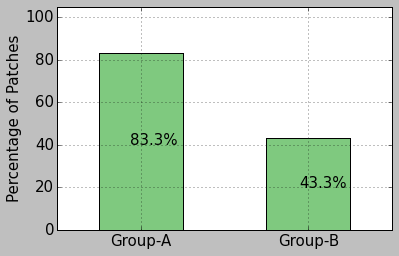

In [112]:
fname="dor_comparision_100percnet_06_GrA_GrB"
ylabel = "Percentage of Patches"
plotting_defaults['legend'] = False
ax = mydf[['>89 %']].plot(**plotting_defaults)
ax.set_ylabel(ylabel,fontdict={'fontsize':plotting_defaults["fontsize"]})
#ax.set_title("Group-B",fontdict={'fontsize':plotting_defaults["fontsize"]})
ax.text(-0.06,40,"83.3%",fontdict={'fontsize':plotting_defaults["fontsize"]})
ax.text(0.95,20,"43.3%",fontdict={'fontsize':plotting_defaults["fontsize"]})
plt.savefig(fname)
plotting_defaults['legend'] = True

## Effect of Duration of Stability on Degree of Repigmentation

In [113]:
col_ranges = [(0,25),(26,50),(51,75),(76,100)] # DOR ranges
col_unit = ""
row_ranges = [(1,2),(3,5),(6,10),(11,25)] # stbility
row_unit = "Y"
attr_col = "DOR_06"
attr_row = "stability_yrs"
df1 = get_matrix_ranges(attr_col,attr_row,col_ranges,row_ranges,col_unit,row_unit,sdf_a)
df1.head()

,0-25,26-50,51-75,76-100
1-2 Y,0,0,0,9
3-5 Y,0,3,0,18
6-10 Y,0,0,0,0
11-25 Y,0,0,0,0


In [114]:
df1p = cal_percentage(df1)
df1p.head()

,0-25,26-50,51-75,76-100
1-2 Y,0,0.000000,0,100.000000
3-5 Y,0,14.285714,0,85.714286
6-10 Y,NaN,NaN,NaN,NaN
11-25 Y,NaN,NaN,NaN,NaN


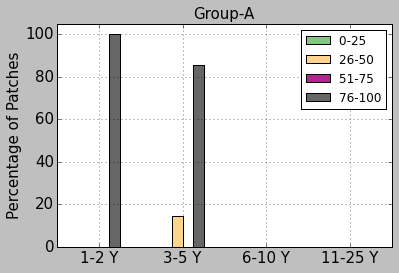

In [115]:
fname="stability_dor_GrA"
ylabel = "Percentage of Patches"
ax = df1p.plot(**plotting_defaults)
ax.set_ylabel(ylabel,fontdict={'fontsize':plotting_defaults["fontsize"]})
ax.set_title("Group-A",fontdict={'fontsize':plotting_defaults["fontsize"]})
plt.savefig(fname)

In [116]:
col_ranges = [(0,25),(26,50),(51,75),(76,100)] # DOR ranges
col_unit = ""
row_ranges = [(1,2),(3,5),(6,10),(11,25)] # stbility
row_unit = "Y"
attr_col = "DOR_06"
attr_row = "stability_yrs"
df1 = get_matrix_ranges(attr_col,attr_row,col_ranges,row_ranges,col_unit,row_unit,sdf_b)
df1.head()

,0-25,26-50,51-75,76-100
1-2 Y,0,0,0,4
3-5 Y,0,0,0,0
6-10 Y,8,6,1,6
11-25 Y,1,1,0,3


In [117]:
df1p = cal_percentage(df1)

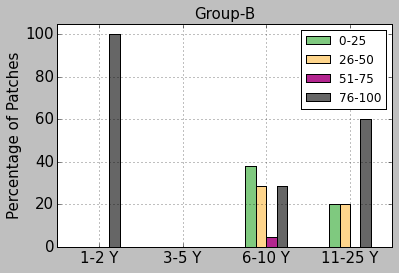

In [118]:
fname="stability_dor_GrB"
ylabel = "Percentage of Patches"
ax = df1p.plot(**plotting_defaults)
ax.set_ylabel(ylabel,fontdict={'fontsize':plotting_defaults["fontsize"]})
ax.set_title("Group-B",fontdict={'fontsize':plotting_defaults["fontsize"]})
plt.savefig(fname)

## Effect of Type of Vitiligo on 100% repigmentation

In [119]:
# Group A
col_ranges =  [[0,89],[90,100]]
col_unit = "%"
attr_col = "DOR_06"
attr_row = "type_of_vitiligo"
categories = sites_df[attr_row].unique()
dfa = get_matrix_categories(attr_col,attr_row,col_ranges,col_unit,sdf_a,categories)
dfap = cal_percentage(dfa)
dfap.head()

,0-89 %,90-100 %
Segmental vitiligo,0.000000,100.000000
Non Segmental,19.230769,80.769231
Focal viitligo,0.000000,100.000000


In [120]:
# Group A
col_ranges =  [[0,89],[90,100]]
col_unit = "%"
attr_col = "DOR_06"
attr_row = "type_of_vitiligo"
categories = sites_df[attr_row].unique()
dfb = get_matrix_categories(attr_col,attr_row,col_ranges,col_unit,sdf_b,categories)
dfbp = cal_percentage(dfb)
dfbp.head()

,0-89 %,90-100 %
Segmental vitiligo,NaN,NaN
Non Segmental,56.666667,43.333333
Focal viitligo,NaN,NaN


In [121]:
index = ['Group-A','Group-B']
columns = ['Segmental','Non-Segmental','Focal']
data = [np.array(dfap["90-100 %"]),np.array(dfbp["90-100 %"])]
data
df_ab = pd.DataFrame(data=data,index = index ,columns=columns)
df_ab.head()

,Segmental,Non-Segmental,Focal
Group-A,100,80.769231,100
Group-B,NaN,43.333333,NaN


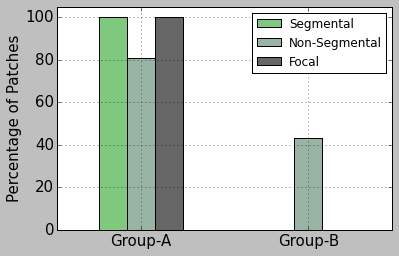

In [122]:
fname="dor_type_100percnet_06_GrA_GrB"
ylabel = "Percentage of Patches"
#plotting_defaults['legend'] = False
ax = df_ab.plot(**plotting_defaults)
ax.set_ylabel(ylabel,fontdict={'fontsize':plotting_defaults["fontsize"]})
#ax.set_title("Group-B",fontdict={'fontsize':plotting_defaults["fontsize"]})
#ax.text(-0.06,40,"83.3%",fontdict={'fontsize':plotting_defaults["fontsize"]})
#ax.text(0.95,20,"43.3%",fontdict={'fontsize':plotting_defaults["fontsize"]})
plt.savefig(fname)
plotting_defaults['legend'] = True

## Effect of Type of Vitiligo on Degree of Repigmentation

In [123]:
# Group A
col_ranges = [(0,25),(26,50),(51,75),(76,100)] # DOR ranges
col_unit = "%"
attr_col = "DOR_06"
attr_row = "type_of_vitiligo"
categories = sites_df[attr_row].unique()
df1 = get_matrix_categories(attr_col,attr_row,col_ranges,col_unit,sdf_a,categories)
df1.head()

,0-25 %,26-50 %,51-75 %,76-100 %
Segmental vitiligo,0,0,0,3
Non Segmental,0,3,0,23
Focal viitligo,0,0,0,1


In [124]:
df1p = cal_percentage(df1)
df1p.index = ('Segmental','Non-Segmental','Focal')
df1p.head()

,0-25 %,26-50 %,51-75 %,76-100 %
Segmental,0,0.000000,0,100.000000
Non-Segmental,0,11.538462,0,88.461538
Focal,0,0.000000,0,100.000000


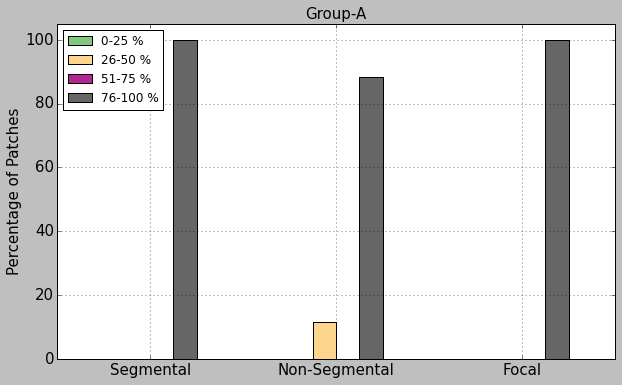

In [125]:
fname="type_of_vitiligo_dor_GrA"
ylabel = "Percentage of Patches"
plotting_defaults["figsize"] = (10,6)
ax = df1p.plot(**plotting_defaults)
ax.set_ylabel(ylabel,fontdict={'fontsize':plotting_defaults["fontsize"]})
ax.set_title("Group-A",fontdict={'fontsize':plotting_defaults["fontsize"]})
plt.savefig(fname)
plotting_defaults["figsize"] = (6,4)

In [126]:
# Group B
col_ranges = [(0,25),(26,50),(51,75),(76,100)] # DOR ranges
col_unit = "%"
attr_col = "DOR_06"
attr_row = "type_of_vitiligo"
categories = sites_df[attr_row].unique()
df1 = get_matrix_categories(attr_col,attr_row,col_ranges,col_unit,sdf_b,categories)
df1.head()

,0-25 %,26-50 %,51-75 %,76-100 %
Segmental vitiligo,0,0,0,0
Non Segmental,9,7,1,13
Focal viitligo,0,0,0,0


In [127]:
df1p = cal_percentage(df1)
df1p.index = ('Segmental','Non-Segmental','Focal')
df1p.head()

,0-25 %,26-50 %,51-75 %,76-100 %
Segmental,NaN,NaN,NaN,NaN
Non-Segmental,30,23.333333,3.333333,43.333333
Focal,NaN,NaN,NaN,NaN


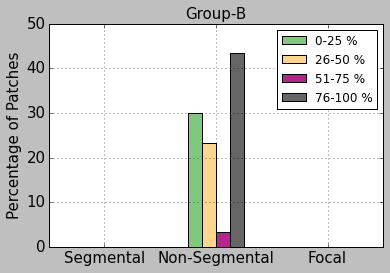

In [128]:
fname="type_of_vitiligo_dor_GrB"
ylabel = "Percentage of Patches"
plotting_defaults["ylim"] = (0,50)
ax = df1p.plot(**plotting_defaults)
ax.set_ylabel(ylabel,fontdict={'fontsize':plotting_defaults["fontsize"]})
ax.set_title("Group-B",fontdict={'fontsize':plotting_defaults["fontsize"]})
plt.savefig(fname)
plotting_defaults["ylim"] = (0,105)
plotting_defaults["figsize"] = (6,4)

In [129]:
# just for 06 month - Group A
col_ranges = [(0,89.9999999),(90,100)] # DOR ranges
col_unit = "%"
attr_col = "DOR_06"
attr_row = "type_of_vitiligo"
categories = sites_df[attr_row].unique()
df1 = get_matrix_categories(attr_col,attr_row,col_ranges,col_unit,sdf_a,categories)
df1.head()

,0-89.9999999 %,90-100 %
Segmental vitiligo,0,3
Non Segmental,5,21
Focal viitligo,0,1


In [130]:
# just for 06 month - Group B
col_ranges = [(0,89.9999999),(90,100)] # DOR ranges
col_unit = "%"
attr_col = "DOR_06"
attr_row = "type_of_vitiligo"
categories = sites_df[attr_row].unique()
df1 = get_matrix_categories(attr_col,attr_row,col_ranges,col_unit,sdf_b,categories)
#df1*100/30
df1.head()

,0-89.9999999 %,90-100 %
Segmental vitiligo,0,0
Non Segmental,17,13
Focal viitligo,0,0


In [131]:
ct = chi2_contingency(np.array([[3,21,1],[0,13,0]]),correction=False)
print "chi-square:%.3f,p_value:%.3f"%(ct[0],ct[1])

chi-square:2.325,p_value:0.313


## Effect of anatomical site of lesion on degree of repigmentation

In [132]:

# 6 month - Group A
col_ranges = [(0,25),(26,50),(51,75),(76,100)] # DOR ranges
col_unit = ""
attr_col = "DOR_06"
attr_row = "broad_site"
categories = sites_df[attr_row].unique()
df1 = get_matrix_categories(attr_col,attr_row,col_ranges,col_unit,sdf_a,categories)
df1.head()

,0-25,26-50,51-75,76-100
Limb,0,2,0,7
Joint,0,0,0,12
Acral,0,0,0,4
Trunk,0,1,0,1
Head and Neck,0,0,0,3


In [133]:
df1p = cal_percentage(df1)
df1p.head()

,0-25,26-50,51-75,76-100
Limb,0,22.222222,0,77.777778
Joint,0,0.000000,0,100.000000
Acral,0,0.000000,0,100.000000
Trunk,0,50.000000,0,50.000000
Head and Neck,0,0.000000,0,100.000000


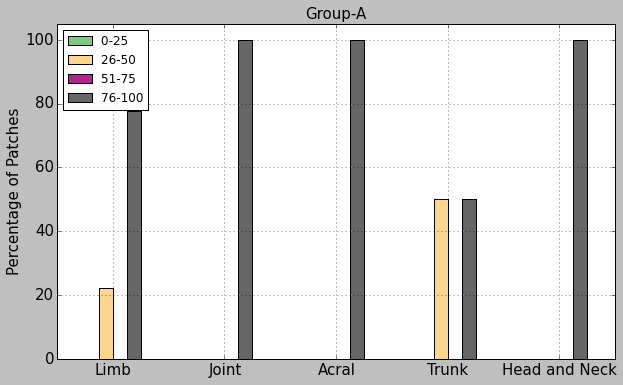

In [134]:
fname="broad_site_dor_GrA"
ylabel = "Percentage of Patches"
#plotting_defaults["ylim"] = (0,50)
plotting_defaults["figsize"] = (10,6)
ax = df1p.plot(**plotting_defaults)
ax.set_ylabel(ylabel,fontdict={'fontsize':plotting_defaults["fontsize"]})
ax.set_title("Group-A",fontdict={'fontsize':plotting_defaults["fontsize"]})
plt.savefig(fname)
#plotting_defaults["ylim"] = (0,105)
plotting_defaults["figsize"] = (6,4)

In [135]:
# 6 moth - Group B
col_ranges = [(0,25),(26,50),(51,75),(76,100)] # DOR ranges
col_unit = "%"
attr_col = "DOR_06"
attr_row = "broad_site"
categories = sites_df[attr_row].unique()
df1 = get_matrix_categories(attr_col,attr_row,col_ranges,col_unit,sdf_b,categories)
df1.head()

,0-25 %,26-50 %,51-75 %,76-100 %
Limb,7,4,0,7
Joint,2,3,1,4
Acral,0,0,0,2
Trunk,0,0,0,0
Head and Neck,0,0,0,0


In [136]:
df1p = cal_percentage(df1)
df1p.head()

,0-25 %,26-50 %,51-75 %,76-100 %
Limb,38.888889,22.222222,0,38.888889
Joint,20.000000,30.000000,10,40.000000
Acral,0.000000,0.000000,0,100.000000
Trunk,NaN,NaN,NaN,NaN
Head and Neck,NaN,NaN,NaN,NaN


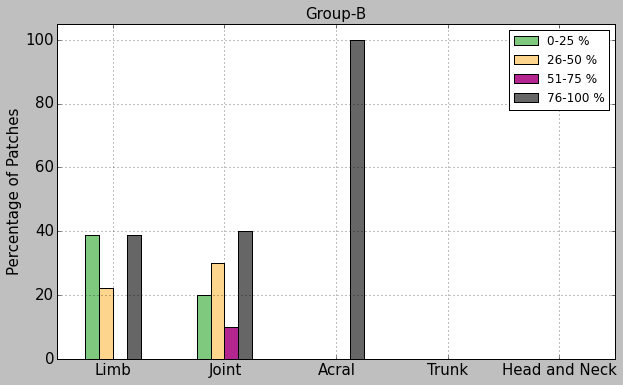

In [137]:
fname="broad_site_dor_GrB"
ylabel = "Percentage of Patches"
#plotting_defaults["ylim"] = (0,50)
plotting_defaults["figsize"] = (10,6)
ax = df1p.plot(**plotting_defaults)
ax.set_ylabel(ylabel,fontdict={'fontsize':plotting_defaults["fontsize"]})
ax.set_title("Group-B",fontdict={'fontsize':plotting_defaults["fontsize"]})
plt.savefig(fname)
#plotting_defaults["ylim"] = (0,105)
plotting_defaults["figsize"] = (6,4)

## Effect of size of lesion on degree of repigmentation

In [138]:
# 6 month - Group A
col_ranges = [(0,25),(26,50),(51,75),(76,100)] # DOR ranges
col_unit = "%"
row_ranges = [(0,0.999999),(1,5),(6,10),(11,25),(26,50)] #area
row_unit = "sq. cm"
attr_col = "DOR_06"
attr_row = "transpanted_area_cm2"
dfa = get_matrix_ranges(attr_col,attr_row,col_ranges,row_ranges,col_unit,row_unit,sdf_a)
dfa.head()

,0-25 %,26-50 %,51-75 %,76-100 %
0-0.999999 sq. cm,0,1,0,4
1-5 sq. cm,0,1,0,14
6-10 sq. cm,0,1,0,6
11-25 sq. cm,0,0,0,3
26-50 sq. cm,0,0,0,0


In [139]:
dfap = cal_percentage(dfa)
idx = list(dfap.index)
idx[0] = '< 1 sq.cm'
dfap.index  = idx
dfap.head()

,0-25 %,26-50 %,51-75 %,76-100 %
< 1 sq.cm,0,20.000000,0,80.000000
1-5 sq. cm,0,6.666667,0,93.333333
6-10 sq. cm,0,14.285714,0,85.714286
11-25 sq. cm,0,0.000000,0,100.000000
26-50 sq. cm,NaN,NaN,NaN,NaN


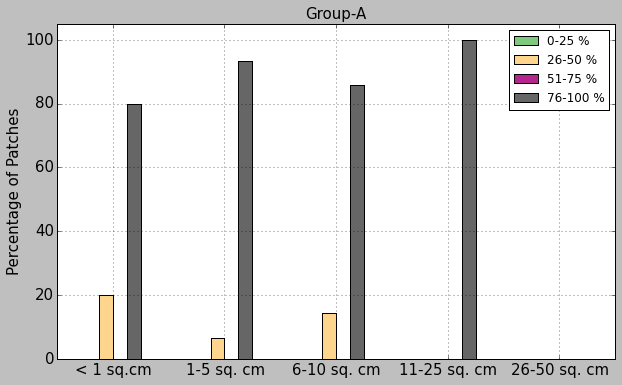

In [140]:
fname="size_lesion_dor_GrA"
ylabel = "Percentage of Patches"
#plotting_defaults["ylim"] = (0,50)
plotting_defaults["figsize"] = (10,6)
ax = dfap.plot(**plotting_defaults)
ax.set_ylabel(ylabel,fontdict={'fontsize':plotting_defaults["fontsize"]})
ax.set_title("Group-A",fontdict={'fontsize':plotting_defaults["fontsize"]})
plt.savefig(fname)
#plotting_defaults["ylim"] = (0,105)
#plotting_defaults["figsize"] = (6,4)

In [141]:
# 6 month - Group B
col_ranges = [(0,25),(26,50),(51,75),(76,100)] # DOR ranges
col_unit = "%"
row_ranges = [(0,0.999999),(1,5),(6,10),(11,25),(26,50)] #area
row_unit = "sq. cm"
attr_col = "DOR_06"
attr_row = "transpanted_area_cm2"
dfb = get_matrix_ranges(attr_col,attr_row,col_ranges,row_ranges,col_unit,row_unit,sdf_b)
dfb.head()

,0-25 %,26-50 %,51-75 %,76-100 %
0-0.999999 sq. cm,1,4,0,8
1-5 sq. cm,4,3,1,3
6-10 sq. cm,3,0,0,2
11-25 sq. cm,0,0,0,0
26-50 sq. cm,1,0,0,0


In [142]:
dfbp = cal_percentage(dfb)
idx = list(dfbp.index)
idx[0] = '< 1 sq.cm'
dfbp.index  = idx
dfbp.head()

,0-25 %,26-50 %,51-75 %,76-100 %
< 1 sq.cm,7.692308,30.769231,0.000000,61.538462
1-5 sq. cm,36.363636,27.272727,9.090909,27.272727
6-10 sq. cm,60.000000,0.000000,0.000000,40.000000
11-25 sq. cm,NaN,NaN,NaN,NaN
26-50 sq. cm,100.000000,0.000000,0.000000,0.000000


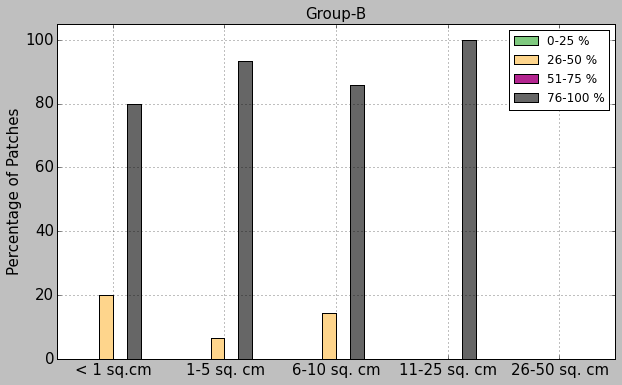

In [143]:
fname="size_lesion_dor_GrB"
ylabel = "Percentage of Patches"
#plotting_defaults["ylim"] = (0,50)
plotting_defaults["figsize"] = (10,6)
ax = dfap.plot(**plotting_defaults)
ax.set_ylabel(ylabel,fontdict={'fontsize':plotting_defaults["fontsize"]})
ax.set_title("Group-B",fontdict={'fontsize':plotting_defaults["fontsize"]})
plt.savefig(fname)
#plotting_defaults["ylim"] = (0,105)
#plotting_defaults["figsize"] = (6,4)

In [144]:
# last index has all zeros
for idx in dfa.index:
    x = dfa.loc[idx]
    y = dfb.loc[idx]
    obs = remove_zeros(np.array([x,y]))
    if (obs.size > 2):
        ct = chi2_contingency(obs,correction=False)
        print idx + ": chi-square:%.3f,p_value:%.3f"%(ct[0],ct[1])

0-0.999999 sq. cm: chi-square:0.720,p_value:0.698
1-5 sq. cm: chi-square:12.805,p_value:0.005
6-10 sq. cm: chi-square:5.829,p_value:0.054


## 

In [145]:
col_ranges = [(0,25),(26,50),(51,75),(76,100)] # DOR ranges
col_unit = "%"
row_ranges = [(0,0.999999),(1,5),(6,10),(11,25),(26,50)] #area
row_unit = "sq. cm"
attr_col = "DOR_06"
attr_row = "transpanted_area_cm2"
df1 = get_matrix_ranges(attr_col,attr_row,col_ranges,row_ranges,col_unit,row_unit,sdf_a)
df1.head()

,0-25 %,26-50 %,51-75 %,76-100 %
0-0.999999 sq. cm,0,1,0,4
1-5 sq. cm,0,1,0,14
6-10 sq. cm,0,1,0,6
11-25 sq. cm,0,0,0,3
26-50 sq. cm,0,0,0,0


In [146]:
df1 = get_matrix_ranges(attr_col,attr_row,col_ranges,row_ranges,col_unit,row_unit,sdf_b)
df1.head()

,0-25 %,26-50 %,51-75 %,76-100 %
0-0.999999 sq. cm,1,4,0,8
1-5 sq. cm,4,3,1,3
6-10 sq. cm,3,0,0,2
11-25 sq. cm,0,0,0,0
26-50 sq. cm,1,0,0,0


In [147]:
#patients_df.transpanted_area_cm2
x = 8+4+4+20+15+1.0
y=11.50+7.75+9+63.25+37.93+1.5
y/x
patients_df[['donar_size_cm2','transpanted_area_cm2']]
x1 = 10+20+30+20+40
y1 = 1.0+14.79+63.98+11.29+6.84
x1/y1

1.2257405515832482

## Comparision of Degree of Repigmentation (Sub) in both groups (Month wise)

In [148]:
sdf_a.columns

Index([u'patient_id', u'group', u'patient_name', u'age', u'gender',
       u'type_of_vitiligo', u'duration_of_vitiligo_yrs', u'sites',
       u'norm_sites', u'stability_yrs', u'donar_area', u'donar_size_cm2',
       u'site_id', u'area_transplanted', u'transpanted_area_cm2',
       u'type_of_repigmentation', u'onset', u'DOR_01', u'DOR_03', u'DOR_06',
       u'total_transplanted_area', u'no_of_reciepient_sites', u'Subj_01',
       u'Subj_03', u'Subj_06', u'Complications_Donor area_01',
       u'Complications_Donor_03', u'Complications_Donor_06', u'PGH_01',
       u'PGH_03', u'PGH_06', u'CM_01', u'CM_03', u'CM_06', u'broad_site'],
      dtype='object')

In [152]:
mydata_a = sdf_a[['Subj_01','Subj_03','Subj_06']]

In [158]:
columns = mydata_a.Subj_06.unique()
index = ['']